Importing the Dependencies

In [7]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



Data Collection and Analysis

PIMA Diabetes Dataset

In [10]:
base_dir = os.getcwd()  # 'C:/Users/loved/mulit_disease_model/multi_disease_model/notebook'
file_path = os.path.join(base_dir, '..', 'dataset', 'diabetes dataset.csv')
diabetes_dataset = pd.read_csv(file_path)
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [12]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [14]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [15]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [16]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [17]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Train Test Split

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# svm

In [20]:
classifier = svm.SVC(kernel='linear')
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

### Model Evaluation

Accuracy Score

In [21]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [22]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7833876221498371


In [23]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [24]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


In [25]:

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier with a linear kernel
classifier = svm.SVC(kernel='linear')

# Train the classifier on the scaled training data
classifier.fit(X_train_scaled, Y_train)

# Predictions and evaluation
Y_pred = classifier.predict(X_test_scaled)

 Accuracy Score: 0.7727272727272727

 Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



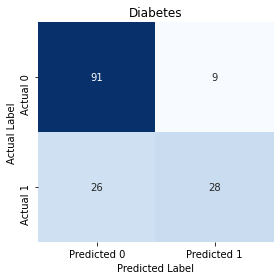


 Cross-validation scores: [0.80487805 0.75609756 0.76422764 0.83739837 0.74590164]
 Mean CV Accuracy: 0.7817006530721045


In [26]:
print(" Accuracy Score:", accuracy_score(Y_test, Y_pred))
print("\n Classification Report:\n", classification_report(Y_test, Y_pred))
# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1']
           ,cbar=False)

plt.title('Diabetes')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.tight_layout()
plt.show()

# Cross-validation (on training data)
cv_scores = cross_val_score(classifier, X_train_scaled, Y_train, cv=5)
print("\n Cross-validation scores:", cv_scores)
print(" Mean CV Accuracy:", cv_scores.mean())


### Making a Predictive System

In [22]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


### Saving the trained model

filename = '../models/diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))


with open("../scaler/diabetes_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
    # loading the saved model
loaded_model = pickle.load(open('../models/diabetes_model.sav', 'rb'))
loaded_scaler = pickle.load(open(scaler_path, 'rb'))


In [23]:
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Save the trained model
model_path = '../models/diabetes_model.sav'
scaler_path = '../scaler/diabetes_scaler.pkl'

pickle.dump(classifier, open(model_path, 'wb'))  # Save model
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)  # Save scaler

print("✅ Model and scaler saved successfully.")

# 2. Load the saved model and scaler
loaded_model = pickle.load(open(model_path, 'rb'))
loaded_scaler = pickle.load(open(scaler_path, 'rb'))

# 3. Transform test data using loaded scaler
X_test_scaled = loaded_scaler.transform(X_test)

# 4. Predict using the loaded model
Y_pred_loaded = loaded_model.predict(X_test_scaled)



✅ Model and scaler saved successfully.


In [24]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


In [25]:
for column in X.columns:
    print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


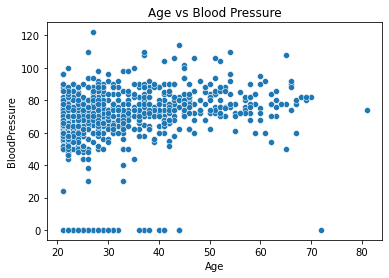

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x='Age', y='BloodPressure', data=diabetes_dataset)
plt.title("Age vs Blood Pressure")
plt.show()
